In [ ]:
import pandas as pd ## library for data import
import numpy as np ## library for mathematical operations
import seaborn as sns ## library for data visualization
import matplotlib.pyplot as plt ## library for data visualization
import warnings
import matplotlib.dates as mdates
# Ignore warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '/content/brighton.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)
# Display the first few rows of the DataFrame to verify that it has been read correctly
print(df)

                   datetime  temp  dew  humidity  precip  precipprob  \
0       2010-01-01T00:00:00   1.9 -0.5     84.25   0.417       100.0   
1       2010-01-01T01:00:00   1.9 -0.5     83.90   0.000         0.0   
2       2010-01-01T02:00:00   1.4 -0.7     85.76   0.000         0.0   
3       2010-01-01T03:00:00   1.4 -0.7     85.69   0.000         0.0   
4       2010-01-01T04:00:00   1.3 -0.8     85.72   0.000         0.0   
...                     ...   ...  ...       ...     ...         ...   
122917  2024-01-06T07:00:00   5.1  3.5     89.07     NaN         0.0   
122918  2024-01-06T08:00:00   5.0  3.5     90.24     NaN         0.0   
122919  2024-01-06T09:00:00   4.9  3.9     92.89     NaN         0.0   
122920  2024-01-06T10:00:00   5.9  4.8     92.47     NaN         0.0   
122921  2024-01-06T11:00:00   6.8  4.8     86.98     NaN         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
0       rain,snow   0.0        0.0       19.4     11.0     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122922 entries, 0 to 122921
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          122922 non-null  object 
 1   temp              122668 non-null  float64
 2   dew               122646 non-null  float64
 3   humidity          122653 non-null  float64
 4   precip            122643 non-null  float64
 5   precipprob        122636 non-null  float64
 6   preciptype        11355 non-null   object 
 7   snow              89900 non-null   float64
 8   snowdepth         89369 non-null   float64
 9   windspeed         122661 non-null  float64
 10  winddir           122645 non-null  float64
 11  sealevelpressure  122397 non-null  float64
 12  cloudcover        122634 non-null  float64
 13  solarradiation    122592 non-null  float64
 14  solarenergy       122558 non-null  float64
 15  uvindex           122564 non-null  float64
dtypes: float64(14), obje

In [ ]:
## checking for null values
df.isnull().sum()

datetime                 0
temp                   254
dew                    276
humidity               269
precip                 279
precipprob             286
preciptype          111567
snow                 33022
snowdepth            33553
windspeed              261
winddir                277
sealevelpressure       525
cloudcover             288
solarradiation         330
solarenergy            364
uvindex                358
dtype: int64

In [ ]:
## summary of the data
df.describe()

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
count,122668.000000,122646.000000,122653.000000,122643.000000,122636.000000,89900.000000,89369.000000,122661.000000,122645.000000,122397.000000,122634.000000,122592.000000,122558.000000,122564.000000
mean,11.053034,8.044064,82.829737,0.084445,8.880671,0.006481,0.035895,15.933882,196.442837,1014.885308,60.810808,138.496076,0.507043,1.377321
std,5.658082,5.136644,12.668373,0.667855,28.441260,0.208962,0.500345,8.902611,106.343378,27.445144,31.892666,220.686351,0.864993,2.251184
min,-9.100000,-11.600000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,7.200000,4.500000,75.530000,0.000000,0.000000,0.000000,0.000000,9.400000,113.000000,1009.600000,35.925000,0.000000,0.000000,0.000000
50%,11.000000,8.400000,85.690000,0.000000,0.000000,0.000000,0.000000,14.400000,223.000000,1016.400000,68.400000,9.000000,0.000000,0.000000
75%,15.300000,12.000000,92.790000,0.000000,0.000000,0.000000,0.000000,21.300000,267.000000,1022.500000,89.700000,200.800000,0.700000,2.000000
max,33.300000,20.200000,100.000000,32.385000,100.000000,7.870000,96.000000,72.200000,360.000000,1049.300000,100.000000,1150.000000,14.000000,15.000000


In [ ]:
# Convert datetime column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])


In [ ]:
# Check percentage of null values in each column
null_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
datetime             0.000000
temp                 0.206635
dew                  0.224533
humidity             0.218838
precip               0.226973
precipprob           0.232668
preciptype          90.762435
snow                26.864190
snowdepth           27.296172
windspeed            0.212330
winddir              0.225346
sealevelpressure     0.427100
cloudcover           0.234295
solarradiation       0.268463
solarenergy          0.296123
uvindex              0.291242
dtype: float64


In [ ]:
def drop_columns_with_high_missing_values(df, threshold=90):

    # df (DataFrame): Input DataFrame.
    # threshold (float): Threshold percentage of missing values. Default is 90.

    # Calculate the percentage of missing values in each column
    missing_percentage = df.isnull().sum() / len(df) * 100

    # Identify columns with missing percentage above the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

    # Drop the identified columns from the DataFrame
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

In [ ]:
## dropping the columns which contain more than 90% missing which I think is not important features
df = drop_columns_with_high_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122922 entries, 0 to 122921
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          122922 non-null  datetime64[ns]
 1   temp              122668 non-null  float64       
 2   dew               122646 non-null  float64       
 3   humidity          122653 non-null  float64       
 4   precip            122643 non-null  float64       
 5   precipprob        122636 non-null  float64       
 6   snow              89900 non-null   float64       
 7   snowdepth         89369 non-null   float64       
 8   windspeed         122661 non-null  float64       
 9   winddir           122645 non-null  float64       
 10  sealevelpressure  122397 non-null  float64       
 11  cloudcover        122634 non-null  float64       
 12  solarradiation    122592 non-null  float64       
 13  solarenergy       122558 non-null  float64       
 14  uvin

In [ ]:
def fill_missing_with_mean(df):

## Returns: DataFrame with missing values filled with mean.
    # Fill missing values with the mean of each numeric column
    df_filled = df.fillna(df.mean(numeric_only=True))

    return df_filled
df1 = fill_missing_with_mean(df)
df1

,datetime,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2010-01-01 00:00:00,1.9,-0.5,84.25,0.417000,100.0,0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0
1,2010-01-01 01:00:00,1.9,-0.5,83.90,0.000000,0.0,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0
2,2010-01-01 02:00:00,1.4,-0.7,85.76,0.000000,0.0,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0
3,2010-01-01 03:00:00,1.4,-0.7,85.69,0.000000,0.0,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0
4,2010-01-01 04:00:00,1.3,-0.8,85.72,0.000000,0.0,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122917,2024-01-06 07:00:00,5.1,3.5,89.07,0.084445,0.0,0.0,0.0,9.6,327.0,1013.2,65.1,0.0,0.0,0.0
122918,2024-01-06 08:00:00,5.0,3.5,90.24,0.084445,0.0,0.0,0.0,8.9,320.0,1014.0,89.9,0.0,0.0,0.0
122919,2024-01-06 09:00:00,4.9,3.9,92.89,0.084445,0.0,0.0,0.0,9.6,321.0,1015.0,85.5,23.0,0.1,0.0
122920,2024-01-06 10:00:00,5.9,4.8,92.47,0.084445,0.0,0.0,0.0,7.8,340.0,1016.0,51.7,72.0,0.3,1.0


In [ ]:
## checking whether any null values is present again or not
df1.isnull().sum()

datetime            0
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
uvindex             0
dtype: int64

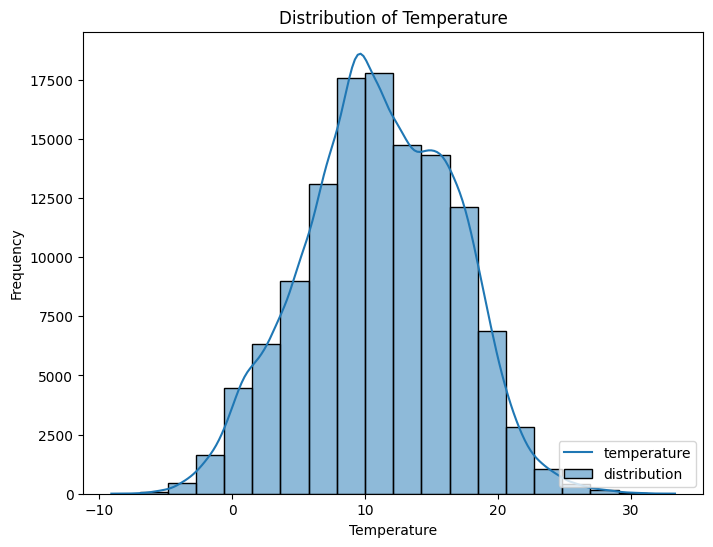

In [ ]:
#  Histogram of 'temp' column
plt.figure(figsize=(8, 6))
sns.histplot(df1['temp'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(["temperature", "distribution"], loc="lower right")
plt.show()

###
justification: The graph show the distribution of temperature using histogram. From the graph it can be said that most of the time the temperature was between 10 to 20 degree for Brighton where as there are hardly some days when the temperature drops to negative

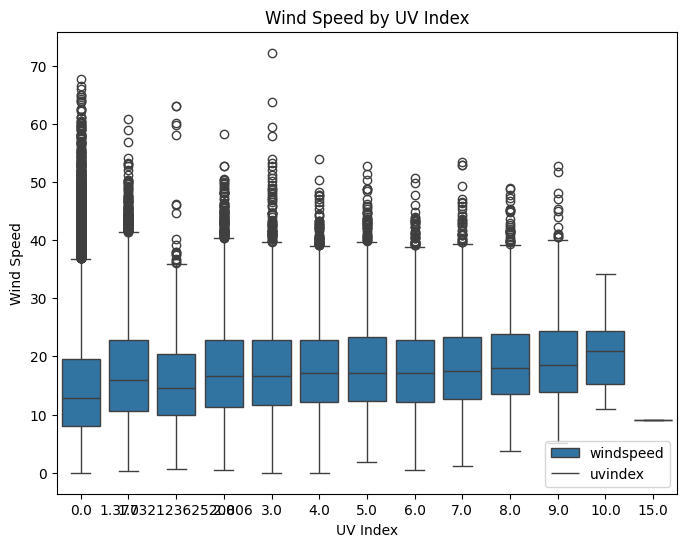

In [ ]:
# Boxplot of 'windspeed' by 'uvindex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='uvindex', y='windspeed', data=df1)
plt.title('Wind Speed by UV Index')
plt.xlabel('UV Index')
plt.ylabel('Wind Speed')
plt.legend(["windspeed", "uvindex"], loc="lower right")
plt.show()

#### Using the dataset df1, this code generates a box plot to show the link between wind speed ('windspeed') and UV index ('uvindex'). Different UV index levels are shown by the x-axis, while wind speed data are shown on the y-axis. The axes of the plot, which is named "Wind Speed by UV Index," are suitably labeled. The lower-right corner has a legend that helps differentiate between "windspeed" and "uvindex." From the graph it can be seen that there is presence of outliers in the column. A data point that substantially deviates from the other observations in a dataset is called an outlier. It may distort the outcomes of statistical analysis or modeling when its value is abnormally high or low.



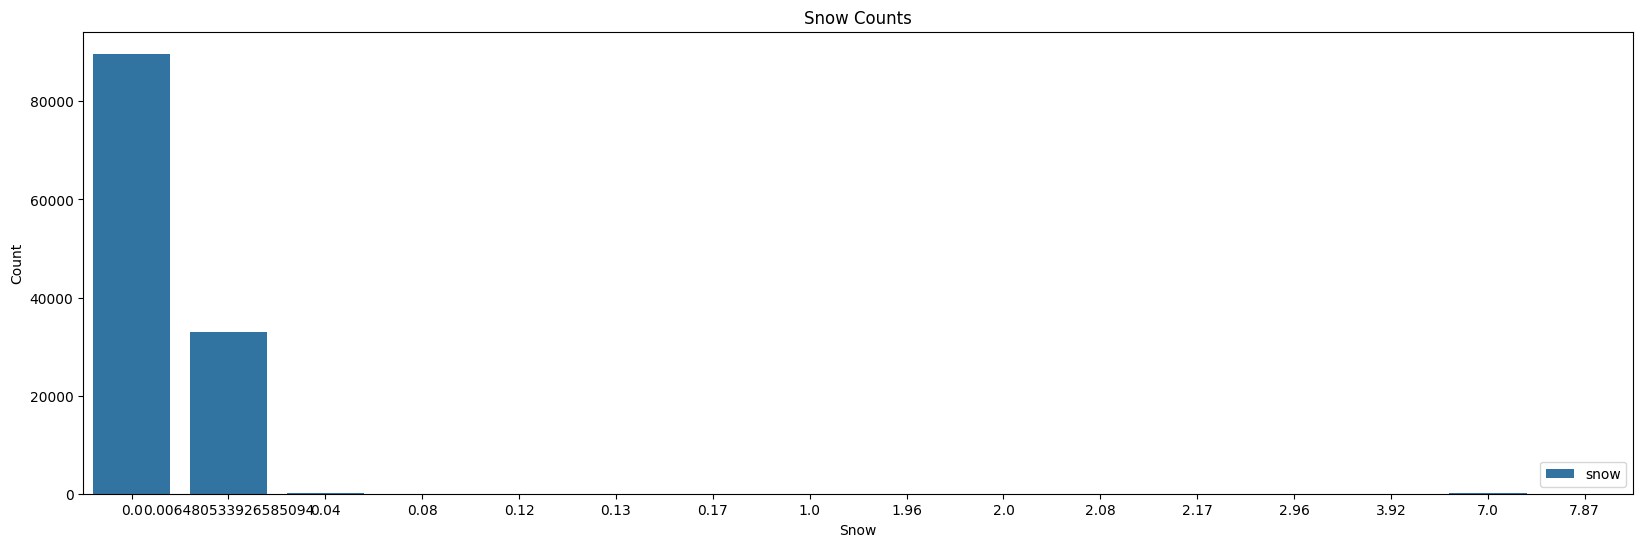

In [ ]:
# Bar plot of 'snow' counts
plt.figure(figsize=(20, 6))
sns.countplot(x='snow', data=df1)
plt.title('Snow Counts')
plt.xlabel('Snow')
plt.ylabel('Count')
plt.legend(["snow"], loc="lower right")
plt.show()

#### In the dataset df1, this code generates a count plot to show the frequency of various values of the'snow' variable. Every bar shows the number of times a certain value of "snow" has occurred. 'Snow Counts' is the title of the plot, which has labeled axes and a caption indicating the variable it represents. The shows suggest that there is hardly any snowfall in the city over the years

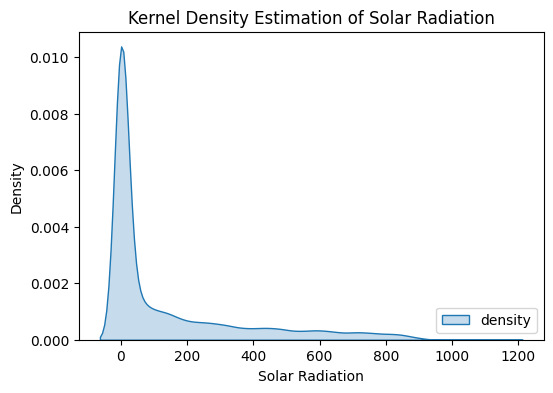

In [ ]:
# KDE plot of 'solarradiation'
plt.figure(figsize=(6, 4))
sns.kdeplot(df1['solarradiation'], shade=True)
plt.title('Kernel Density Estimation of Solar Radiation')
plt.xlabel('Solar Radiation')
plt.ylabel('Density')
plt.legend(["density", "solar radiation"], loc="lower right")
plt.show()


#### Out of the dataset df1, this code creates a kernel density plot (KDE) to estimate the probability density function of the'solarradiation' variable. Higher density areas are highlighted by shading the area beneath the curve in the KDE plot. 'Kernel Density Estimation of Solar Radiation' is the title of the plot, which has labeled axes and a caption that separates the word'solarradiation' from the KDE. The maximum frequency it reaches is 0.010 over the time span


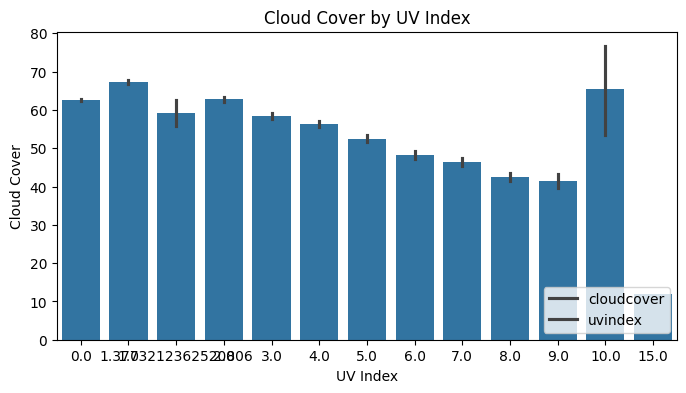

In [ ]:
# Bar plot of 'cloudcover' by 'uvindex'
plt.figure(figsize=(8, 4))
sns.barplot(x='uvindex', y='cloudcover', data=df1)
plt.title('Cloud Cover by UV Index')
plt.xlabel('UV Index')
plt.ylabel('Cloud Cover')
plt.legend(["cloudcover", "uvindex"], loc="lower right")
plt.show()

#### This code generates a bar plot from the dataset df1 to compare the average cloud cover ('cloudcover') at various UV index levels ('uvindex'). For a given UV index level, each bar shows the mean cloud cover. The variables depicted are indicated by a legend, and the figure is captioned "Cloud Cover by UV Index" and has labeled axes. The graph shows that the highest frequency is present for the value of 10.0 and min frequency for the value 15

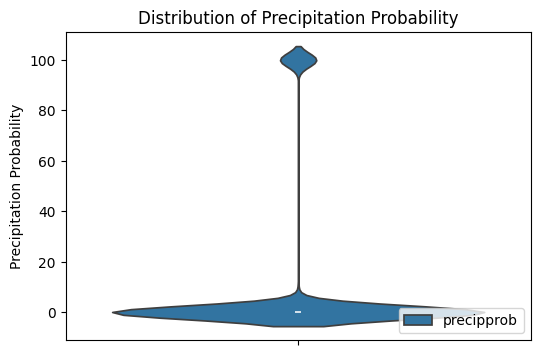

In [ ]:
# Violin plot of 'precipprob'
plt.figure(figsize=(6, 4))
sns.violinplot(y='precipprob', data=df1)
plt.title('Distribution of Precipitation Probability')
plt.ylabel('Precipitation Probability')
plt.legend(["precipprob"], loc="lower right")
plt.show()

#### To see the distribution of precipitation probability (or "precipprob") from the dataset df1, this code creates a violin plot. The precipitation probability values are shown by a plot, where larger regions correspond to greater densities. With "Precipitation Probability" written on the y-axis, the graphic is named "Distribution of Precipitation Probability." The variable that is represented is shown with a legend. Data distribution and probability density may both be effectively shown using violin graphs.

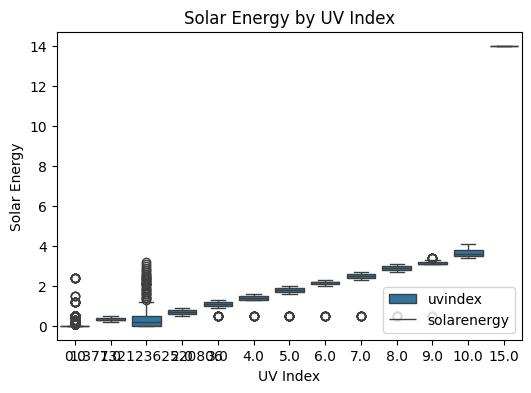

In [ ]:
# Boxplot of 'solarenergy' by 'uvindex'
plt.figure(figsize=(6, 4))
sns.boxplot(x='uvindex', y='solarenergy', data=df1)
plt.title('Solar Energy by UV Index')
plt.xlabel('UV Index')
plt.ylabel('Solar Energy')
plt.legend(["uvindex", "solarenergy"], loc="lower right")
plt.show()

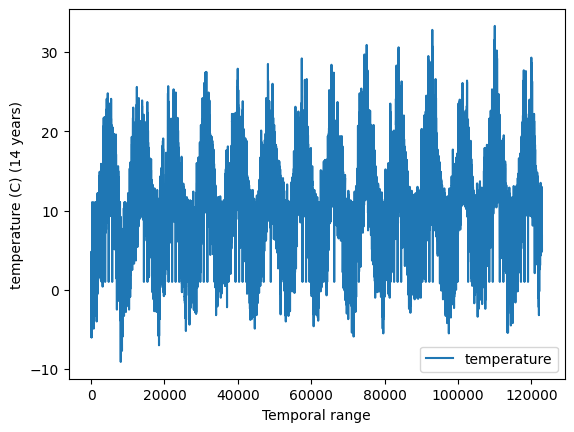

In [ ]:
## visualizing periodicity for temperature column
plt.plot(range(len(df1)), df1['temp'])
plt.xlabel('Temporal range')
plt.ylabel('temperature (C) (14 years)')
plt.legend(["temperature"], loc="lower right")
plt.savefig('temperature_over_time.pdf', bbox_inches='tight')

####

To display the temperature ('temp') values throughout the dataset df1's temporal range, this function generates a line plot. The dataset's index range is represented by the x-axis, which also shows the observations' chronological order. Temperature values are shown on the y-axis in degrees Celsius. Titled 'Temperature (C) (14 years)', the plot features labeled axes. Furthermore, a legend designating the plotted data as "temperature" is provided in the lower-right corner. From the graph it can be said that maximum temperature reached was more than 30 degree for the city and minimum it reached was -10 degree

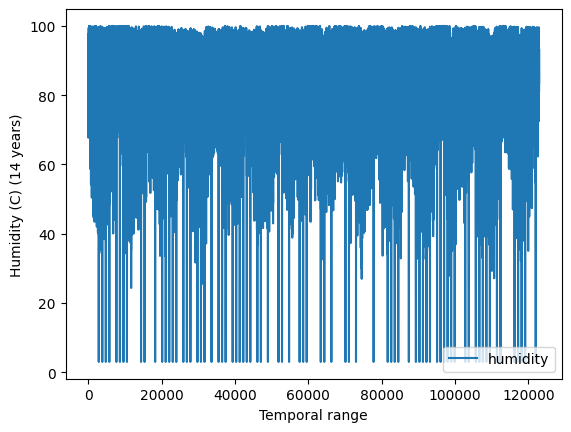

In [ ]:
## checking periodicity for humidity
plt.plot(range(len(df1)), df1['humidity'])
plt.xlabel('Temporal range')
plt.ylabel('Humidity (C) (14 years)')
plt.legend(["humidity"], loc="lower right")

#### Using the time range of the dataset df1, this code creates a line plot to display the humidity (or "humidity") values. The dataset's index range, which shows the observations' chronological order, is represented by the x-axis. Humidity readings are shown on the y-axis. Plotting the data as 'humidity' is indicated by a legend in the lower-right corner of the plot, which bears the title 'Humidity (C) (14 years)'. The axes are identified and humidity is mostly in the range of 90s for the city

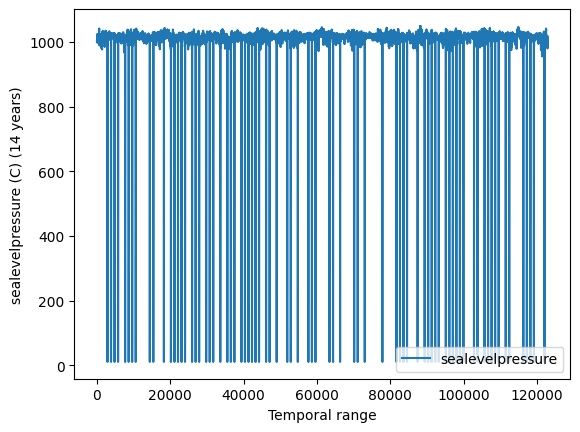

In [ ]:
plt.plot(range(len(df1)), df1['sealevelpressure'])
plt.xlabel('Temporal range')
plt.ylabel('sealevelpressure (C) (14 years)')
plt.legend(["sealevelpressure"], loc="lower right")

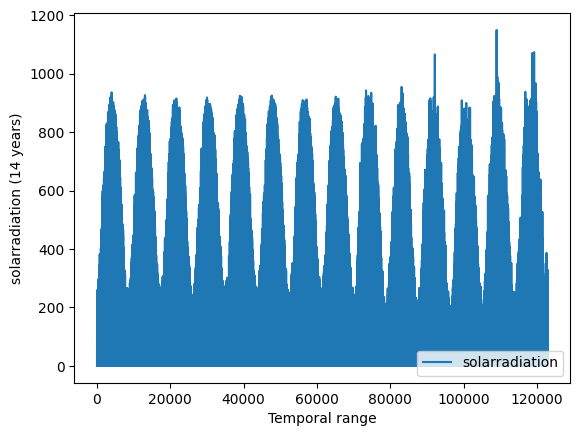

In [ ]:
## for solarradiation
plt.plot(range(len(df1)), df1['solarradiation'])
plt.xlabel('Temporal range')
plt.ylabel('solarradiation (14 years)')
plt.legend(["solarradiation"], loc="lower right")

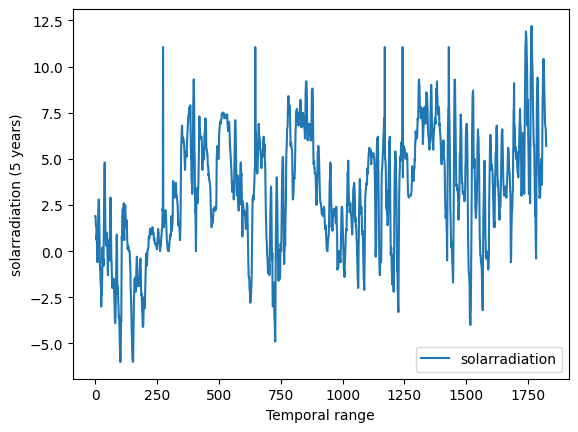

In [ ]:
# Look at the first 5 years
length = 5*365
plt.plot(range(length), df1['temp'][:length])
plt.xlabel('Temporal range')
plt.ylabel('solarradiation (5 years)')
plt.legend(["solarradiation"], loc="lower right")

#### The sun radiation values from the dataframe df1's "solarradiation" column are shown on a line graph using this code, spanning a temporal range of five years (365 days * five years). The temporal period's index range is shown on the x-axis, while solar radiation levels are shown on the y-axis. The plotted data is identified as "solarradiation" by a legend on the plot, which is labeled "solarradiation (5 years)". The average temperature in the city is around 10 degree centigrade

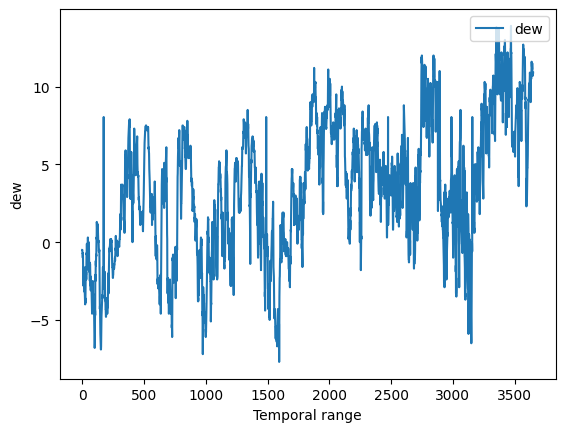

In [ ]:
# Look at the first 10 years
length = 10*365
plt.plot(range(length), df1['dew'][:length])
plt.xlabel('Temporal range')
plt.ylabel('dew')
plt.legend(["dew"], loc="upper right")

#### From the above code the dew that falls is seen for the 1st 10 years.. The graph shows that maximum dew that occured is around 20 and minimum dew is -3

#### The above code suggest about the amount of dews over the time span by looking at the periodicity. There is sometimes we can see from the graph the values becomes negative and most of the times it remains in the positive

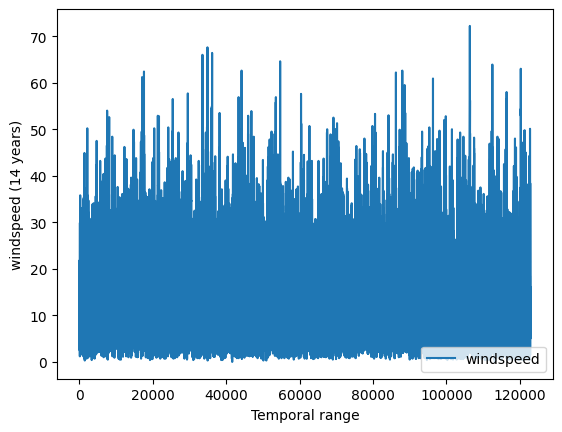

In [ ]:
plt.plot(range(len(df1)), df1['windspeed'])
plt.xlabel('Temporal range')
plt.ylabel('windspeed (14 years)')
plt.legend(["windspeed"], loc="lower right")

#### I am assuming temperature as the most important features and aim to build some deep learning model and finally do future forecasting of temperature for next couple of days or months

In [ ]:
X = df1.drop(columns=['datetime'])  # Features
y = df1['temp']  # Target variable
# Split the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#### The dataset is ready for machine learning modeling with this bit of code:

The goal variable, which represents temperature ('temp'), is specified as y, and features are defined as X, excluding the 'datetime' column.
Using the train_test_split function from scikit-learn, the dataset is divided into training, testing, and validation sets.
Initially, 80% of the dataset is utilized for training and 20% is used for testing, dividing it into training and testing sets.
The training set is then divided into training and validation sets, using 20% of the training data for hyperparameter tuning validation and the remaining 80% of the training data for real training.

In [ ]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_indices]

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(sorted_features, feature_importances[sorted_indices]):
    print(f"{feature}: {importance}")

Feature Importances:
temp: 0.9999962310292493
dew: 1.6492287955961305e-06
windspeed: 9.345042305024891e-07
winddir: 4.0879790996860546e-07
sealevelpressure: 2.5484033426065636e-07
humidity: 2.390229013470354e-07
cloudcover: 8.45539054395218e-08
solarenergy: 7.30166891268408e-08
solarradiation: 3.0237918950491434e-08
precipprob: 2.9417426203517054e-08
snow: 2.2731236838841284e-08
snowdepth: 1.980881025050297e-08
uvindex: 1.323126577715449e-08
precip: 9.579326488328568e-09


#### Each feature's relative significance in predicting the target variable is represented by its feature importances. In this result:

The feature that influences the forecast the most is the temperature, or "temp," which has the highest relevance.
Windspeed and "dew" (dew point) come next with noticeably lower importances, indicating that they have a less impact on the prediction performance.
Even less significant effects on the target variable are indicated by other characteristics like "winddir," "sealevelpressure," "humidity," and "cloudcover."
In the prediction procedure, features like "solarenergy," "solarradiation," "precipprob," "snow," "snowdepth," and "uvindex" that have values that are almost equal to 0 are deemed insignificant.


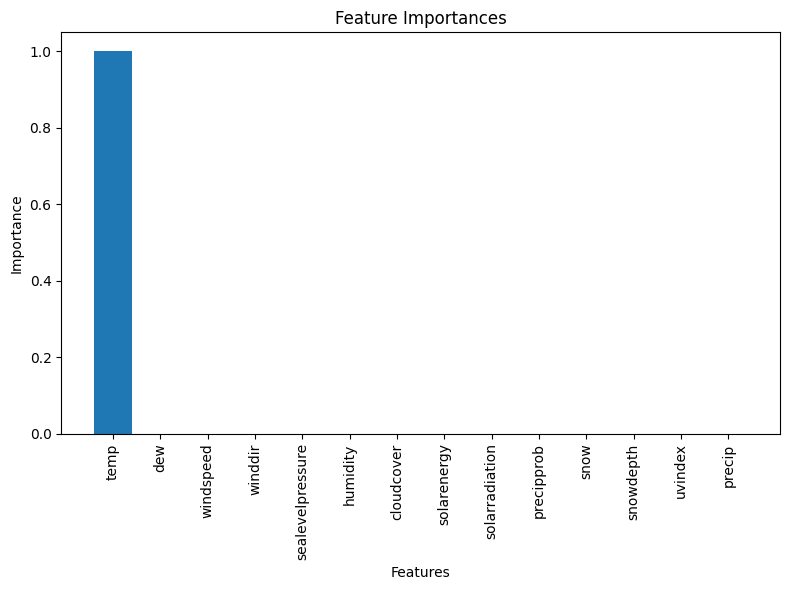

In [ ]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_features)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#### ASSUMPTIONS
1)Temporal Dependency: Given that observations are recorded at different time periods (hourly, daily, etc.), the dataset most likely displays temporal dependency. According to this hypothesis, data points that are closer in time can be more connected than those that are farther away.

2)Stationarity: When statistical attributes like mean and variance are consistent throughout time, the data may show signs of stationarity. This presumption might not apply to all variables, particularly those that are impacted by trends or seasonal patterns.

3)Missing Values: Analysis and modeling techniques may be impacted by missing values in the dataset. Appropriate handling of missing data is essential to prevent bias and guarantee the correctness of the findings.

4) The column where more than 90 percent missing values is there is not important and does not have effect on the performance of the model and so it is dropped

#### REFERENCES

1) https://github.com/albanda/CE888-2023/blob/main/lab8-RNN/rnn.ipynb

2) Schultz, Martin G., Clara Betancourt, Bing Gong, Felix Kleinert, Michael Langguth, Lukas Hubert Leufen, Amirpasha Mozaffari, and Scarlet Stadtler. "Can deep learning beat numerical weather prediction?." Philosophical Transactions of the Royal Society A 379, no. 2194 (2021): 20200097.

3) Hossain, Moinul, Banafsheh Rekabdar, Sushil J. Louis, and Sergiu Dascalu. "Forecasting the weather of Nevada: A deep learning approach." In 2015 international joint conference on neural networks (IJCNN), pp. 1-6. IEEE, 2015.




In the my assignment I am planning to use model like recurrent neural network as done in lab 8 some some other models like GRU and any hybrid model and finally will compare which one performs the best.. The evaluation metrics that is being used here are: RMSE,MSE,MAPE and MAE and finally I will find out the future forecasting value for temperature for next couple of days using the model